# Redefining NBA Positions Through Unsupervised Learning

I'll be scraping 2016-2017 player data from basketballreference.com, then normalizing data so that we only look at how each players stats compare to their other stats proportionally, and then using k-means to recluster players into 5 new positions.

I'll then explore which players fall into which positions, and attempt to redefine the five new positions according to their defining stat categories.

In [1]:
import pandas as pd
import numpy as np
import scrapy
import requests
from scrapy.selector import Selector
from scrapy.http import HtmlResponse

In [3]:
# getting the HTML for the whole page

response = requests.get("http://www.basketball-reference.com/leagues/NBA_2017_totals.html")
HTML = response.text  
HTML[0:150]

u'<!DOCTYPE html>\n<html data-version="klecko-" data-root="/home/bbr/build" itemscope itemtype="http://schema.org/WebSite" lang="en" class="no-js" >\n<hea'

In [4]:
players = Selector(text=HTML).xpath("//tbody/tr[@class='full_table']").extract()

In [30]:
data = []

for player in players:
    
    name = Selector(text=player).xpath(".//td[@data-stat='player']//text()").extract()[0]
    position = Selector(text=player).xpath(".//td[@data-stat='pos']//text()").extract()[0]
    age = Selector(text=player).xpath(".//td[@data-stat='age']//text()").extract()[0]
    games_played = Selector(text=player).xpath(".//td[@data-stat='g']//text()").extract()[0]
    games_started = Selector(text=player).xpath(".//td[@data-stat='gs']//text()").extract()[0]
    mp = Selector(text=player).xpath(".//td[@data-stat='mp']//text()").extract()[0]
    fg = Selector(text=player).xpath(".//td[@data-stat='fg']//text()").extract()[0]
    fga = Selector(text=player).xpath(".//td[@data-stat='fga']//text()").extract()[0]
    #fg_pct = Selector(text=player).xpath(".//td[@data-stat='fg_pct']//text()").extract()[0]
    fg_3 = Selector(text=player).xpath(".//td[@data-stat='fg3']//text()").extract()[0]
    fg_3_a = Selector(text=player).xpath(".//td[@data-stat='fg3a']//text()").extract()[0]
    #fg3_pct = Selector(text=player).xpath(".//td[@data-stat='fg3_pct']//text()").extract()[0]
    fg_2 = Selector(text=player).xpath(".//td[@data-stat='fg2']//text()").extract()[0]
    fg_2_a = Selector(text=player).xpath(".//td[@data-stat='fg2a']//text()").extract()[0]
    #fg2_pct = Selector(text=player).xpath(".//td[@data-stat='fg2_pct']//text()").extract()[0]
    #effective_fg_pct = Selector(text=player).xpath(".//td[@data-stat='efg_pct']//text()").extract()[0]
    ft = Selector(text=player).xpath(".//td[@data-stat='ft']//text()").extract()[0]
    fta = Selector(text=player).xpath(".//td[@data-stat='fta']//text()").extract()[0]
    #ft_pct = Selector(text=player).xpath(".//td[@data-stat='ft_pct']//text()").extract()[0]
    orb = Selector(text=player).xpath(".//td[@data-stat='orb']//text()").extract()[0]
    drb = Selector(text=player).xpath(".//td[@data-stat='drb']//text()").extract()[0]
    trb = Selector(text=player).xpath(".//td[@data-stat='trb']//text()").extract()[0]
    ast = Selector(text=player).xpath(".//td[@data-stat='ast']//text()").extract()[0]
    stl = Selector(text=player).xpath(".//td[@data-stat='stl']//text()").extract()[0]
    blk = Selector(text=player).xpath(".//td[@data-stat='blk']//text()").extract()[0]
    tov = Selector(text=player).xpath(".//td[@data-stat='tov']//text()").extract()[0]
    pf = Selector(text=player).xpath(".//td[@data-stat='pf']//text()").extract()[0]
    pts = Selector(text=player).xpath(".//td[@data-stat='pts']//text()").extract()[0]

    player_dict = {
        'player': name,
        'pos': position,
        'age': age,
        'gp': games_played,
        'gs': games_started,
        'mp': mp,
        'fg': fg,
        'fga': fga,
        #'fg_pct': fg_pct,
        'fg_3': fg_3,
        'fg_3_a': fg_3_a,
        #'fg_3_pct': fg3_pct,
        'fg_2': fg_2,
        'fg_2_a': fg_2_a,
        #'fg_2_pct': fg2_pct,
        #'effective_fg_pct': effective_fg_pct,
        'ft': ft,
        'fta': fta,
        #'ft_pct': ft_pct,
        'orb': orb,
        'drb': drb,
        'trb': trb,
        'ast': ast,
        'stl': stl,
        'blk': blk,
        'tov': tov,
        'pf': pf,
        'pts': pts
    }
    
    data.append(player_dict)
    print name

df = pd.DataFrame(data)



Alex Abrines
Quincy Acy
Steven Adams
Arron Afflalo
Alexis Ajinca
Cole Aldrich
LaMarcus Aldridge
Lavoy Allen
Tony Allen
Al-Farouq Aminu
Chris Andersen
Alan Anderson
Justin Anderson
Kyle Anderson
Ryan Anderson
Giannis Antetokounmpo
Carmelo Anthony
Joel Anthony
Trevor Ariza
Darrell Arthur
Omer Asik
D.J. Augustin
Luke Babbitt
Ron Baker
Wade Baldwin
Leandro Barbosa
J.J. Barea
Harrison Barnes
Matt Barnes
Will Barton
Brandon Bass
Nicolas Batum
Jerryd Bayless
Aron Baynes
Kent Bazemore
Bradley Beal
Malik Beasley
Michael Beasley
Marco Belinelli
DeAndre' Bembry
Dragan Bender
Anthony Bennett
Ben Bentil
Davis Bertans
Patrick Beverley
Bismack Biyombo
Nemanja Bjelica
Tarik Black
Eric Bledsoe
Bojan Bogdanovic
Andrew Bogut
Joel Bolomboy
Devin Booker
Trevor Booker
Avery Bradley
Corey Brewer
Malcolm Brogdon
Aaron Brooks
Anthony Brown
Bobby Brown
Jaylen Brown
Nicolas Brussino
Reggie Bullock
Trey Burke
Alec Burks
Jimmy Butler
Bruno Caboclo
Jose Calderon
Kentavious Caldwell-Pope
Isaiah Canaan
Clint Capela
D

In [33]:
df.to_csv("2016_2017_player_stats.csv")

## Noramalizing

Because I'm not interested in how many points or rebounds a players scores overall, but more so what amount of their contribution is comprised of particular stats I want to do two transformation steps before clustering:

1.  Min Max scale my data, so that all stats are on the same scale.  I don't want someone to be more defined by their points than rebounds just because people generally score more points than rebounds.
2.  Calculate what percentage of one's overall stats each stat makes.  This will represent the individual contribution of each stat category to their personal overall stat make up.  I'm concerned with what particular skills players excel at relative to their other skills, rather than relative to other players.

In [63]:
df_norm = df.copy()
df_norm.index = df.player.values

In [64]:
del(df_norm['player'])

In [65]:
del(df_norm['pos'])

In [66]:
for c in df_norm.columns:
    df_norm[c] = df_norm[c].astype(float)

In [73]:
# I want to go from season stats to per game averages.

for c in df_norm.columns:
    if (c != 'age') and (c != 'gp') and (c != 'gs'):
        df_norm[c] = df_norm[c] / df_norm['gp']


ast
blk
drb
fg
fg_2
fg_2_a
fg_3
fg_3_a
fga
ft
fta
mp
orb
pf
pts
stl
tov
trb


In [74]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()

X = min_max.fit_transform(df_norm)

In [75]:
df_norm = pd.DataFrame(X, columns=df_norm.columns, index=df.player.values)

In [76]:
df_norm.head()

,age,ast,blk,drb,fg,fg_2,fg_2_a,fg_3,fg_3_a,fga,...,fta,gp,gs,mp,orb,pf,pts,stl,tov,trb
Alex Abrines,0.190476,0.052591,0.039216,0.096855,0.191940,0.060435,0.071987,0.337055,0.363696,0.209269,...,0.066252,0.827160,0.073171,0.394885,0.062148,0.434194,0.189061,0.268526,0.084717,0.089506
Quincy Acy,0.333333,0.042349,0.131579,0.242138,0.179426,0.089221,0.109634,0.237411,0.237142,0.186692,...,0.145170,0.456790,0.012195,0.372291,0.123570,0.456645,0.184992,0.181818,0.096472,0.214179
Steven Adams,0.190476,0.096109,0.325000,0.403160,0.455357,0.480308,0.425721,0.000000,0.001252,0.341673,...,0.295360,0.975309,0.975610,0.785230,0.827609,0.631295,0.358214,0.542857,0.318588,0.544060
Arron Afflalo,0.571429,0.114320,0.038251,0.184184,0.295401,0.207164,0.229647,0.247824,0.247855,0.287329,...,0.140172,0.740741,0.548780,0.677471,0.034640,0.441562,0.267339,0.169896,0.120195,0.145025
Alexis Ajinca,0.428571,0.027509,0.188034,0.325335,0.222278,0.234457,0.232339,0.000000,0.010269,0.190465,...,0.094298,0.469136,0.182927,0.380185,0.276923,0.511345,0.168070,0.253080,0.138760,0.321196


In [77]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 486 entries, Alex Abrines to Ivica Zubac
Data columns (total 21 columns):
age       486 non-null float64
ast       486 non-null float64
blk       486 non-null float64
drb       486 non-null float64
fg        486 non-null float64
fg_2      486 non-null float64
fg_2_a    486 non-null float64
fg_3      486 non-null float64
fg_3_a    486 non-null float64
fga       486 non-null float64
ft        486 non-null float64
fta       486 non-null float64
gp        486 non-null float64
gs        486 non-null float64
mp        486 non-null float64
orb       486 non-null float64
pf        486 non-null float64
pts       486 non-null float64
stl       486 non-null float64
tov       486 non-null float64
trb       486 non-null float64
dtypes: float64(21)
memory usage: 83.5+ KB


Before going to the percentage of player's stats step, I want to choose which stats I'm going to cluster on and drop the rest.

In [78]:
# age is not a bball stat
del(df_norm['age'])

# trb is encapsulated in orb + drb
del(df_norm['trb'])

# fg is encapsulated in fg2 and fg3
del(df_norm['fg'])
del(df_norm['fga'])

del(df_norm['fta'])

del(df_norm['gp'])
del(df_norm['gs'])
del(df_norm['mp'])

In [79]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 486 entries, Alex Abrines to Ivica Zubac
Data columns (total 13 columns):
ast       486 non-null float64
blk       486 non-null float64
drb       486 non-null float64
fg_2      486 non-null float64
fg_2_a    486 non-null float64
fg_3      486 non-null float64
fg_3_a    486 non-null float64
ft        486 non-null float64
orb       486 non-null float64
pf        486 non-null float64
pts       486 non-null float64
stl       486 non-null float64
tov       486 non-null float64
dtypes: float64(13)
memory usage: 53.2+ KB


In [87]:
def calculate_row_pct(row):
    total = row.sum()
    for c in df_norm.columns:
        row[c] = row[c] / total
    return row

In [89]:
df_morphed = df_norm.apply(calculate_row_pct, axis=1)

(array([ 21.,  14.,  12.,  10.,  10.,   7.,   7.,   7.,   2.,   6.,   5.,
          4.,   9.,   3.,   7.,   7.,   2.,   6.,  11.,   5.,   4.,   2.,
          4.,   4.,   3.,   6.,   5.,   5.,   4.,   3.,   2.,   5.,   3.,
          8.,   5.,   5.,   3.,   7.,   6.,   6.,   8.,   4.,   7.,   6.,
          5.,   4.,   7.,   1.,   4.,   6.,   8.,   3.,   8.,   5.,   4.,
          3.,   4.,   8.,   9.,   6.,   3.,   3.,   1.,   3.,   6.,   7.,
          2.,   7.,   5.,   5.,   7.,   5.,   6.,   5.,   2.,   3.,   6.,
          4.,   3.,   3.,   4.,   4.,   4.,   4.,   4.,   3.,   2.,   2.,
          4.,   2.,   2.,   4.,   1.,   2.,   0.,   0.,   1.,   0.,   0.,
          2.]), array([  1.00000000e+00,   3.14700000e+01,   6.19400000e+01,
          9.24100000e+01,   1.22880000e+02,   1.53350000e+02,
          1.83820000e+02,   2.14290000e+02,   2.44760000e+02,
          2.75230000e+02,   3.05700000e+02,   3.36170000e+02,
          3.66640000e+02,   3.97110000e+02,   4.27580000e+02,
         

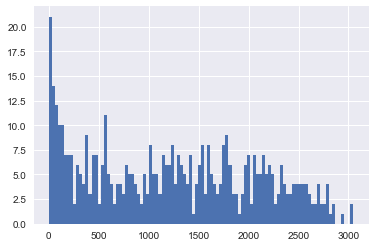

In [122]:
# I want to get rid of players who only played a handful of minutes.

plt.hist(df['mp'].values.astype(int), bins=100)

In [152]:
# Going to drop any player who played less than 250 minutes

In [123]:
df['mp'] = df['mp'].astype(int)

bools = df['mp'] >= 250

df_morphed = df_morphed.loc[bools.values, :]

df = df.loc[bools.values, :]

## Unsupervised Learning + Clustering

I want to try Hierarchial and K-means cluster, and also DBSCAN

In [135]:
from sklearn.cluster import k_means, hierarchical, DBSCAN

In [136]:
kmeans = k_means(df_morphed, n_clusters=5)

In [144]:
df_pos = df_morphed.copy()
df_pos['new_pos'] = kmeans[1]

In [146]:
df['new_pos'] = kmeans[1]

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [147]:
df.new_pos.value_counts()

1    97
4    94
0    76
2    67
3    63
Name: new_pos, dtype: int64

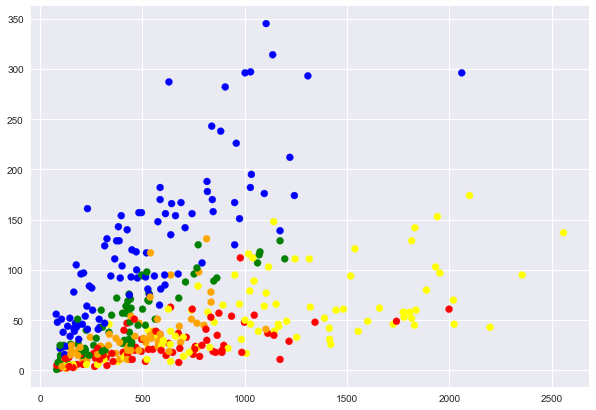

In [148]:
colors = ['red', 'blue', 'green', 'orange', 'yellow']
color_map = [colors[i] for i in df.new_pos]

plt.figure(figsize=(10,7))
plt.scatter(df.pts, df.orb, c=color_map)

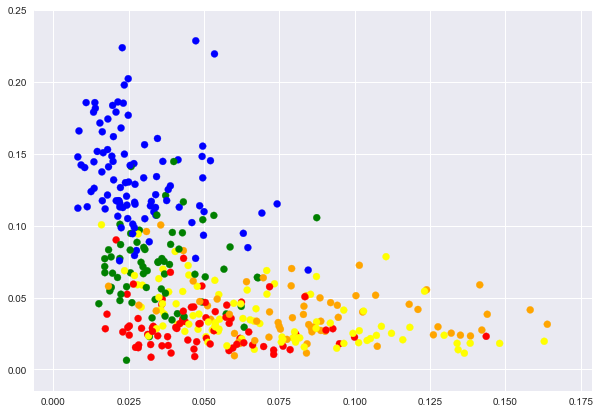

In [149]:
colors = ['red', 'blue', 'green', 'orange', 'yellow']
color_map = [colors[i] for i in df.new_pos]

plt.figure(figsize=(10,7))
plt.scatter(df_morphed.ast, df_morphed.orb, c=color_map)

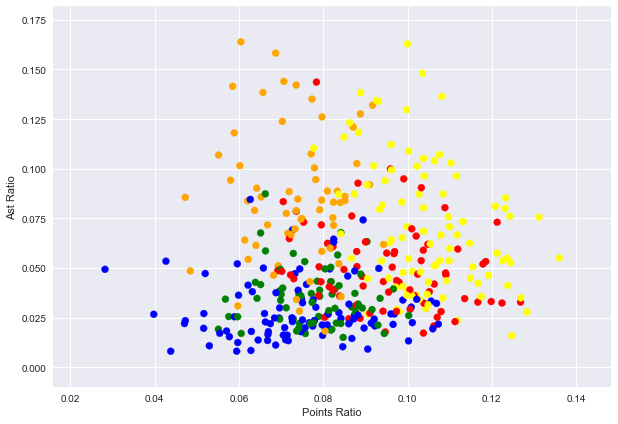

In [151]:
colors = ['red', 'blue', 'green', 'orange', 'yellow']
color_map = [colors[i] for i in df.new_pos]

plt.figure(figsize=(10,7))
plt.scatter(df_morphed.pts, df_morphed.ast, c=color_map)
plt.xlabel('Points Ratio')
plt.ylabel('Ast Ratio')

In [167]:
df[df['player'] == 'Kevin Durant']

,age,ast,blk,drb,fg,fg_2,fg_2_a,fg_3,fg_3_a,fga,...,mp,orb,pf,player,pos,pts,stl,tov,trb,new_pos
118,28,300,99,474,551,434,714,117,312,1026,...,2070,39,117,Kevin Durant,SF,1555,66,138,513,4


In [165]:
df.player = df_pos.index

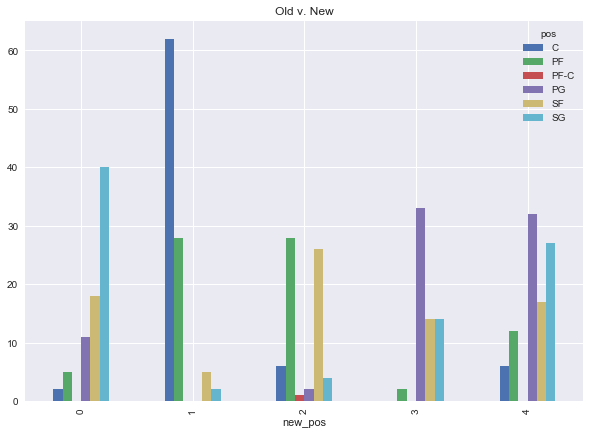

In [162]:
# How do our new positions compare to old positions?

old_v_new = df[['pos', 'new_pos']].groupby(['new_pos', 'pos']).size().unstack()
old_v_new.plot(kind='bar', figsize=(10,7), title="Old v. New")

In [170]:
df_per_game = df.copy()

In [171]:
df_per_game.columns

Index([u'age', u'ast', u'blk', u'drb', u'fg', u'fg_2', u'fg_2_a', u'fg_3',
       u'fg_3_a', u'fga', u'ft', u'fta', u'gp', u'gs', u'mp', u'orb', u'pf',
       u'player', u'pos', u'pts', u'stl', u'tov', u'trb', u'new_pos'],
      dtype='object')

In [173]:
df_per_game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 485
Data columns (total 24 columns):
age        397 non-null object
ast        397 non-null object
blk        397 non-null object
drb        397 non-null object
fg         397 non-null object
fg_2       397 non-null object
fg_2_a     397 non-null object
fg_3       397 non-null object
fg_3_a     397 non-null object
fga        397 non-null object
ft         397 non-null object
fta        397 non-null object
gp         397 non-null object
gs         397 non-null object
mp         397 non-null int64
orb        397 non-null object
pf         397 non-null object
player     397 non-null object
pos        397 non-null object
pts        397 non-null object
stl        397 non-null object
tov        397 non-null object
trb        397 non-null object
new_pos    397 non-null int32
dtypes: int32(1), int64(1), object(22)
memory usage: 76.0+ KB


In [174]:
not_val_c = ['player', 'pos']

# changing counting stats to floats from objects.
for c in df_per_game.columns:
    if c not in not_val_c:
        df_per_game[c] = df_per_game[c].astype(float)

not_per_game_stats = ['age', 'gp', 'gs', 'player', 'pos', 'new_pos']

# converting to per game numbers
for c in df_per_game.columns:
    if c not in not_per_game_stats:
        df_per_game[c] = df_per_game[c] / df_per_game['gp']

In [177]:
# rounding stats to 1 decimal place.
for c in df_per_game.columns:
    if c not in not_per_game_stats:
        df_per_game[c] = [round(stat, 1) for stat in df_per_game[c]]

# Position 4:

### The Modern NBA Star

Notable Players:
- Lebron James
- James Harden
- Russell Westbrook
- Kawhi Leonard
- Demarcus Cousins
- Kevin Durant
- Jimmy Butler
- Anthony Davis
- Isaiah Thomas.

While it's certainly interesting to see Anthony Davis and Isaiah Thomas showing up as filling the same position, this is a clear reflection of the direction the NBA has moved.  A teams best player is going to fill a similar role on many teams, even if those players don't technically fill the same traditional position. Scoring is one of their stronger categories, but they get strong assists and rebounds as well.  This is basically the modern NBA star player, strong scoring, assists and rebounds, but also relatively high turnovers due to how much the ball is in their hands. They're not necessarily the most efficient, but they contribute strongly to the counting categories that people care about.  This category also includes some of the NBA's modern mobile, shooting 'centers,' who although they're big, they find themselves shooting threes and getting assists, mostly due to how much usage they get.

In [179]:

df_per_game[df_per_game['new_pos'] == 4].sort_values('pts', ascending=False)

,age,ast,blk,drb,fg,fg_2,fg_2_a,fg_3,fg_3_a,fga,...,mp,orb,pf,player,pos,pts,stl,tov,trb,new_pos
457,28.0,10.4,0.4,9.0,10.2,7.7,16.8,2.5,7.2,24.0,...,34.6,1.7,2.3,Russell Westbrook,PG,31.6,1.6,5.4,10.7,4.0
171,27.0,11.2,0.5,7.0,8.3,5.1,9.6,3.2,9.3,18.9,...,36.4,1.2,2.7,James Harden,PG,29.1,1.5,5.7,8.1,4.0
423,27.0,5.9,0.2,2.1,9.0,5.8,10.9,3.2,8.5,19.4,...,33.8,0.6,2.2,Isaiah Thomas,PG,28.9,0.9,2.8,2.7,4.0
99,23.0,2.1,2.2,9.5,10.3,9.7,18.6,0.5,1.8,20.4,...,36.1,2.3,2.2,Anthony Davis,C,28.0,1.3,2.4,11.8,4.0
107,27.0,3.9,0.2,4.3,9.7,9.3,19.2,0.4,1.7,20.9,...,35.4,0.9,1.8,DeMar DeRozan,SG,27.3,1.1,2.4,5.2,4.0
89,26.0,4.6,1.3,8.9,9.0,7.2,14.8,1.8,5.1,19.9,...,34.2,2.1,3.9,DeMarcus Cousins,C,27.0,1.4,3.7,11.1,4.0
265,26.0,5.9,0.3,4.3,8.8,6.0,12.1,2.9,7.7,19.8,...,35.9,0.6,2.0,Damian Lillard,PG,27.0,0.9,2.6,4.9,4.0
219,32.0,8.7,0.6,7.3,9.9,8.3,13.5,1.7,4.6,18.2,...,37.8,1.3,1.8,LeBron James,SF,26.4,1.2,4.1,8.6,4.0
260,25.0,3.5,0.7,4.7,8.6,6.6,12.5,2.0,5.2,17.7,...,33.4,1.1,1.6,Kawhi Leonard,SF,25.5,1.8,2.1,5.8,4.0
214,24.0,5.8,0.3,2.5,9.3,6.9,13.6,2.5,6.1,19.7,...,35.1,0.7,2.2,Kyrie Irving,PG,25.2,1.2,2.5,3.2,4.0


# Position 3:

### The Assister/Defensive Specialist

Notable Players:
- Chris Paul
- Draymond Green
- Patrick Beverly
- Rajon Rondo
- Andre Iguodala

These guys include your traditional point guards like chris paul, ricky rubio, and rajon rondo, but also more modern non-point guard distributors like draymond green.  They aren't particularly strong scorers at all, nor are they particularly efficient when they do choose to try and score, but they can shoot threes.  They are strong on the defensive end, not necessarily in terms of shot stopping, but getting into passing lanes and getting steals.


In [180]:
df_per_game[df_per_game['new_pos'] == 3].sort_values('pts', ascending=False)

,age,ast,blk,drb,fg,fg_2,fg_2_a,fg_3,fg_3_a,fga,...,mp,orb,pf,player,pos,pts,stl,tov,trb,new_pos
350,31.0,9.2,0.1,4.3,6.1,4.1,7.9,2.0,5.0,12.9,...,31.5,0.7,2.4,Chris Paul,PG,18.1,1.9,2.4,5.0,3.0
300,25.0,3.4,0.2,3.9,5.2,3.6,7.9,1.6,3.6,11.5,...,30.7,0.4,2.7,Khris Middleton,SF,14.7,1.4,2.2,4.2,3.0
385,26.0,9.1,0.1,3.2,3.5,2.7,6.1,0.8,2.6,8.7,...,32.9,0.9,2.7,Ricky Rubio,PG,11.1,1.7,2.6,4.1,3.0
480,28.0,1.6,0.4,4.3,4.9,4.3,7.7,0.6,1.6,9.3,...,30.2,1.8,1.8,Thaddeus Young,PF,11.0,1.5,1.3,6.1,3.0
34,27.0,2.4,0.7,2.5,4.0,2.8,6.2,1.3,3.6,9.9,...,26.9,0.6,2.3,Kent Bazemore,SF,11.0,1.2,1.7,3.2,3.0
471,20.0,3.7,0.3,3.9,4.4,4.1,10.6,0.4,1.9,12.5,...,34.7,1.3,2.9,Justise Winslow,SF,10.9,1.5,1.8,5.2,3.0
404,22.0,4.6,0.4,2.9,3.4,2.2,5.3,1.2,4.2,9.5,...,30.4,1.0,2.4,Marcus Smart,SG,10.6,1.6,2.0,3.9,3.0
163,26.0,7.0,1.4,6.6,3.6,2.5,5.1,1.1,3.5,8.6,...,32.5,1.3,2.9,Draymond Green,PF,10.2,2.0,2.4,7.9,3.0
56,24.0,4.2,0.2,2.2,3.9,2.8,5.9,1.0,2.6,8.5,...,26.4,0.6,1.9,Malcolm Brogdon,SG,10.2,1.1,1.5,2.8,3.0
373,23.0,2.6,0.7,2.5,3.8,2.4,5.4,1.4,4.3,9.7,...,30.5,0.7,2.5,Josh Richardson,SG,10.2,1.1,1.2,3.2,3.0


# Position 2:

Mobile, Scoring Big

- Kristaps Porzingis

Not super defensively strong, but shoots threes and pulls down rebounds.  Not really very strong on the blocks, but can get a few steals.

In [181]:
df_per_game[df_per_game['new_pos'] == 2].sort_values('pts', ascending=False)

,age,ast,blk,drb,fg,fg_2,fg_2_a,fg_3,fg_3_a,fga,...,mp,orb,pf,player,pos,pts,stl,tov,trb,new_pos
362,21.0,1.5,2.0,5.5,6.7,5.0,10.2,1.7,4.8,14.9,...,32.8,1.7,3.7,Kristaps Porzingis,PF,18.1,0.7,1.8,7.2,2.0
209,27.0,0.9,1.6,5.2,6.0,4.4,8.4,1.6,4.0,12.4,...,30.7,1.6,2.7,Serge Ibaka,PF,14.8,0.5,1.3,6.8,2.0
310,27.0,1.7,0.6,5.1,5.3,4.4,9.1,0.9,2.6,11.7,...,31.2,1.4,3.3,Markieff Morris,PF,14.0,1.1,1.7,6.5,2.0
360,23.0,1.5,0.5,5.0,5.2,3.3,5.8,1.9,4.3,10.0,...,32.6,1.5,2.4,Otto Porter,SF,13.4,1.4,0.5,6.4,2.0
211,29.0,1.7,0.3,4.5,4.7,3.0,6.0,1.7,4.9,10.9,...,26.1,1.4,2.6,Ersan Ilyasova,PF,13.1,0.7,1.4,5.9,2.0
90,26.0,1.5,1.0,5.1,4.4,2.3,4.8,2.0,6.1,10.9,...,31.6,1.4,3.0,Robert Covington,SF,12.9,1.9,2.0,6.5,2.0
467,30.0,1.4,0.7,5.4,3.9,2.3,4.6,1.6,4.7,9.3,...,30.2,1.2,1.8,Marvin Williams,PF,11.2,0.8,0.8,6.6,2.0
262,27.0,1.5,0.3,4.0,4.1,3.5,6.4,0.7,2.2,8.6,...,25.9,1.4,1.9,Jon Leuer,PF,10.2,0.4,0.9,5.4,2.0
172,23.0,1.2,0.9,2.8,4.1,3.2,5.6,0.9,2.5,8.1,...,28.9,1.6,2.8,Maurice Harkless,SF,10.0,1.1,1.1,4.4,2.0
78,19.0,0.7,0.9,3.1,3.5,2.6,5.0,0.9,2.7,7.7,...,21.3,1.2,3.2,Marquese Chriss,PF,9.2,0.8,1.3,4.2,2.0


# Position 1

- More traditional bigs, better on the block, much better scorers, better on the rebound.  These are your strong bigs who contribute in a lot of areas, but not quite as much as your boogies and AD's of the world.
- Also includes your non-scoring bigs, Andrew Bogut, Deandre Jordan, etc.

In [184]:
df_per_game[df_per_game['new_pos'] == 1].sort_values('pts', ascending=False)

,age,ast,blk,drb,fg,fg_2,fg_2_a,fg_3,fg_3_a,fga,...,mp,orb,pf,player,pos,pts,stl,tov,trb,new_pos
432,21.0,2.7,1.3,8.7,9.8,8.5,14.7,1.2,3.4,18.0,...,37.0,3.6,2.9,Karl-Anthony Towns,C,25.1,0.7,2.6,12.3,1.0
6,31.0,1.9,1.2,4.9,6.9,6.6,13.8,0.3,0.8,14.6,...,32.4,2.4,2.2,LaMarcus Aldridge,PF,17.3,0.6,1.4,7.3,1.0
460,27.0,0.7,2.1,10.3,7.0,7.0,12.6,0.0,0.0,12.6,...,32.6,3.8,2.9,Hassan Whiteside,C,17.0,0.7,2.0,14.1,1.0
232,21.0,4.9,0.8,6.9,6.8,6.2,9.8,0.6,1.9,11.7,...,27.9,2.9,2.9,Nikola Jokic,C,16.7,0.8,2.3,9.8,1.0
446,26.0,2.8,1.0,8.0,6.4,6.1,12.7,0.3,1.0,13.7,...,28.8,2.3,2.4,Nikola Vucevic,C,14.6,1.0,1.6,10.4,1.0
435,20.0,1.3,2.1,5.5,5.5,5.0,9.3,0.5,1.4,10.7,...,31.4,1.7,3.2,Myles Turner,C,14.5,0.9,1.3,7.2,1.0
453,23.0,1.1,0.6,3.2,6.1,5.7,10.8,0.4,1.5,12.3,...,31.0,1.9,2.7,T.J. Warren,SF,14.4,1.2,0.9,5.1,1.0
242,24.0,0.9,0.5,4.0,5.6,5.5,9.7,0.1,0.5,10.2,...,21.3,2.7,2.1,Enes Kanter,C,14.3,0.4,1.7,6.7,1.0
370,35.0,1.7,0.1,5.7,5.9,5.6,11.9,0.3,1.3,13.2,...,24.5,2.5,1.9,Zach Randolph,PF,14.1,0.5,1.4,8.2,1.0
154,24.0,1.2,2.6,8.9,5.1,5.1,7.7,0.0,0.0,7.7,...,33.9,3.9,3.0,Rudy Gobert,C,14.0,0.6,1.8,12.8,1.0


# Position 0

### The designated scorer and wing defenders

- The splash brothers
- Kyle Lowry
- Zach Lavine
- Jae Crowder
- Trevor Ariza
- Danny Green

In [186]:
df_per_game[df_per_game['new_pos'] == 0].sort_values('pts', ascending=False)

,age,ast,blk,drb,fg,fg_2,fg_2_a,fg_3,fg_3_a,fga,...,mp,orb,pf,player,pos,pts,stl,tov,trb,new_pos
97,28.0,6.6,0.2,3.7,8.5,4.4,8.3,4.1,10.0,18.3,...,33.4,0.8,2.3,Stephen Curry,PG,25.3,1.8,3.0,4.5,0.0
273,30.0,7.0,0.3,4.0,7.1,3.9,7.5,3.2,7.8,15.3,...,37.4,0.8,2.8,Kyle Lowry,PG,22.4,1.5,2.9,4.8,0.0
426,26.0,2.1,0.5,3.0,8.3,4.8,9.3,3.4,8.3,17.6,...,34.0,0.6,1.8,Klay Thompson,SG,22.3,0.8,1.6,3.7,0.0
254,21.0,3.0,0.2,3.0,6.9,4.4,8.5,2.6,6.6,15.1,...,37.2,0.4,2.2,Zach LaVine,SG,18.9,0.9,1.8,3.4,0.0
157,28.0,2.5,0.5,2.3,5.5,2.2,4.7,3.3,8.8,13.5,...,31.0,0.4,2.0,Eric Gordon,SG,16.2,0.6,1.6,2.7,0.0
371,32.0,1.4,0.2,2.1,5.1,2.5,5.4,2.6,6.0,11.4,...,28.2,0.1,1.6,J.J. Redick,SG,15.0,0.7,1.3,2.2,0.0
170,24.0,2.3,0.2,2.4,5.3,3.4,6.3,1.9,5.3,11.5,...,27.3,0.4,1.3,Tim Hardaway,SG,14.5,0.7,1.3,2.8,0.0
93,28.0,3.0,0.1,1.6,5.5,3.6,6.5,1.9,5.0,11.5,...,23.3,0.2,1.6,Jordan Crawford,SG,14.1,0.6,1.3,1.8,0.0
94,26.0,2.2,0.3,5.1,4.6,2.4,4.5,2.2,5.5,10.0,...,32.4,0.7,2.2,Jae Crowder,SF,13.9,1.0,1.1,5.8,0.0
68,23.0,2.5,0.2,2.5,4.9,2.9,6.5,2.0,5.8,12.2,...,33.3,0.7,1.6,Kentavious Caldwell-Pope,SG,13.8,1.2,1.1,3.3,0.0


In [187]:
df_per_game.columns

Index([u'age', u'ast', u'blk', u'drb', u'fg', u'fg_2', u'fg_2_a', u'fg_3',
       u'fg_3_a', u'fga', u'ft', u'fta', u'gp', u'gs', u'mp', u'orb', u'pf',
       u'player', u'pos', u'pts', u'stl', u'tov', u'trb', u'new_pos'],
      dtype='object')

In [206]:
import plotly.plotly as py
import plotly.graph_objs as go
import cufflinks

# colors = ['red', 'blue', 'yellow', 'green', 'black']
# color_map = [colors[i] for pos in df_per_game.new_pos]

trace1 = go.Scatter3d(
    x=df_per_game['pts'],
    y=df_per_game['trb'],
    z=df_per_game['ast'],
    mode='markers',
    text=df_per_game['player'],
    marker=dict(
        size=12,
        color=df_per_game['new_pos'],             # set color to an array/list of desired values
        colorscale='Jet',                     # choose a colorscale
        opacity=0.8,
    )
)

data = [trace1]

layout = go.Layout( #showlegend=True,
                    scene = dict(
                    xaxis = dict(
                        title='Points'),
                    yaxis = dict(
                        title='Rebounds'),
                    zaxis = dict(
                        title='Assists'),),
                    width=700,
                    margin=dict(
                    r=20, b=10,
                    l=10, t=10)
                  )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='new_pos_pts_ast_reb')

In [205]:
import plotly.plotly as py
import plotly.graph_objs as go
import cufflinks

# colors = ['red', 'blue', 'yellow', 'green', 'black']
# color_map = [colors[i] for pos in df_per_game.new_pos]

trace1 = go.Scatter3d(
    x=df_per_game['blk'],
    y=df_per_game['stl'],
    z=df_per_game['trb'],
    mode='markers',
    text=df_per_game['player'],
    marker=dict(
        size=12,
        color=df_per_game['new_pos'],             # set color to an array/list of desired values
        colorscale='Jet',                     # choose a colorscale
        opacity=0.8,
    )
)

data = [trace1]

layout = go.Layout( #showlegend=True,
                    scene = dict(
                    xaxis = dict(
                        title='Blocks'),
                    yaxis = dict(
                        title='Steals'),
                    zaxis = dict(
                        title='Rebounds'),),
                    width=700,
                    margin=dict(
                    r=20, b=10,
                    l=10, t=10)
                  )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='new_pos_blk_stl_reb')

We can see from this plot that the traditional centers excel in steals and blocks, while the traditional distributor/point guards are weak in those categories but stronger in steals.  Draymond Green is actually a bit of an anomily in the distributor category, because he's so strong in blocks and assists.  Steals is actually something that differentiates traditional 'centers' who are now in my 'modern star' category.  players like Joel Embiid and Anthony Davis stick out from the centers on steals, while still being really strong in rebounds and blocks.

In [204]:
trace1 = go.Scatter3d(
    x=df_per_game['fg_3'],
    y=df_per_game['fg_2'],
    z=df_per_game['fga'],
    mode='markers',
    text=df_per_game['player'],
    marker=dict(
        size=12,
        color=df_per_game['new_pos'],             # set color to an array/list of desired values
        colorscale='Jet',                     # choose a colorscale
        opacity=0.8,
    )
)

data = [trace1]

layout = go.Layout( #showlegend=True,
                    scene = dict(
                    xaxis = dict(
                        title='Three Point FGs'),
                    yaxis = dict(
                        title='Two Point FGs'),
                    zaxis = dict(
                        title='FG attempts'),),
                    width=700,
                    margin=dict(
                    r=20, b=10,
                    l=10, t=10)
                  )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='new_pos_3s_2s_FGA')

This plot really distinguishes well between the traditional centers, modern stars, and designated scorer category.  The designated scores shoot a much higher proportion of threes, while the modern star category is more balnced between 2s and threes, and the centers hardly make any 3s.  The traditional point guards and mobile center/scorer category take less of both, but similar to the stars takes a more balanced amount of each.  The modern star takes by far the most shots of any category.